# Chapter 13: Measuring Text Similarities

## 13.1 Simple Text Comparison

In [1]:
# Assigning texts to variables
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

In [3]:
# Tokenization: Splitting text into individual words
# Splitting text into words
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists

for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



In [5]:
# Removing case sensitivity and punctuation
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
        
    return text.lower()

for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
    
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

Words in text 3
['she', 'sells', '3', 'seashells', 'to', 'john', 'who', 'lives', 'by', 'the', 'lake']



In [6]:
# Converting word lists to sets (to take out duplicates)
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n")

Unique Words in text 1
{'she', 'the', 'sells', 'by', 'seashore', 'seashells'}

Unique Words in text 2
{'sale', 'are', 'the', 'by', 'on', 'seashore', 'seashells'}

Unique Words in text 3
{'lives', 'john', 'she', 'the', 'sells', 'by', 'lake', 'who', '3', 'to', 'seashells'}



In [8]:
# Extracting overlapping words between two texts
words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    print(f"Texts 1 and {i} share these {len(shared_words)} words:")
    print(f"{shared_words}\n")

Texts 1 and 2 share these 4 words:
{'seashells', 'by', 'the', 'seashore'}

Texts 1 and 3 share these 5 words:
{'she', 'the', 'sells', 'by', 'seashells'}



In [9]:
# Extracting diverging words between two texts
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
    print(f"{diverging_words}\n")

Texts 1 and 2 don't share these 5 words:
{'are', 'she', 'sells', 'sale', 'on'}

Texts 1 and 3 don't share these 7 words:
{'lives', 'john', 'lake', 'seashore', 'who', '3', 'to'}



In [10]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. These words are:\n {total_words}\n")
    

Together, texts 1 and 2 contain 9 unique words. These words are:
 {'sale', 'are', 'she', 'the', 'sells', 'by', 'on', 'seashore', 'seashells'}

Together, texts 1 and 3 contain 12 unique words. These words are:
 {'lives', 'john', 'she', 'the', 'sells', 'by', 'lake', '3', 'seashells', 'seashore', 'who', 'to'}



In [12]:
# Extracting the percentage of shared words between two texts
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)
    
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. \n{percent_shared:.2f}% of these words are "
          f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")
# What was developed here is the Jaccard similarity or Jaccard index

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



### 13.1.1 Exploring the Jaccard similarity

In [14]:
# Computing the Jaccard similarity
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
          f"equals {similarity:.4f}." "\n")
# Not very efficient

The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



In [15]:
# Efficiently computing the Jaccard similarity
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

### 13.1.2 Replacing words with numeric values

In [20]:
# Vocabulary: Dictionary of words with numbers representing their count in the text
# Assigning words to numbers in a vocabulary
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value : word for word, value in vocabulary.items()}
print(f"Our vocabulary conatains {len(vocabulary)} words. "
      f"This vocabulary is:\n{vocabulary}")

Our vocabulary conatains 15 words. This vocabulary is:
{'lives': 0, 'are': 1, 'john': 2, 'she': 3, 'the': 4, 'sells': 5, 'by': 6, 'lake': 7, '3': 8, 'seashells': 9, 'sale': 10, 'on': 11, 'seashore': 12, 'who': 13, 'to': 14}


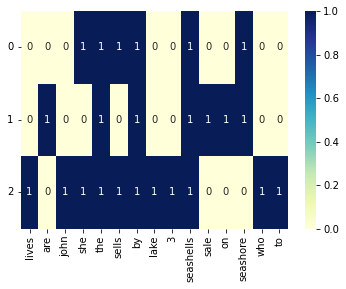

In [24]:
# Text Vectorization: Making text into a 1D array of numbers
# Transforming words into binary vectors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    # np.zeros(len(vocabulary)) # same as line above
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)
        
sns.heatmap(vectors, annot=True, cmap='YlGnBu', xticklabels=vocabulary.keys())
yticklabels=['Text 1', 'Text 2', 'Text 3']
plt.yticks(rotation=0)
plt.show()

In [25]:
# Finding shared words using vector arithmetic
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")

'the' is present in both texts 1 and 2
'by' is present in both texts 1 and 2
'seashells' is present in both texts 1 and 2
'seashore' is present in both texts 1 and 2


In [27]:
# Counting shared words using vector arithmetic
shared_word_count = sum(vector1[i] * vector2[i] for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)
# Dot Product: Sum of Pairwise products across all vector indices

In [28]:
# Computing a vector dot product using NumPy
assert vector1.dot(vector2) == shared_word_count
assert vector1 @ vector2 == shared_word_count

In [29]:
# Counting total words using vector arithmetic
assert vector1 @ vector1 == len(words_set1)
assert vector2 @ vector2 == len(words_set2)

In [31]:
# Tanimoto Similarity: Vectorized implementation of Jaccard similarity
# Computing text similarity using vector arithmetic
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total

for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)

In [32]:
# Computing the similarity of non-binary vectors
non_binary_vector1 = np.array([5, 3])
non_binary_vector2 = np.array([5, 2])
similarity = tanimoto_similarity(non_binary_vector1, non_binary_vector2)
print(f"The similarity of 2 non-binary vectors is {similarity}")

The similarity of 2 non-binary vectors is 0.96875


## 13.2 Vectorizing texts using word counts